In [25]:
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [26]:
# Нахождение С численно

# Подынтегральная функция
def integrand(x):
    return chi2.pdf(x, 24) 

# Функция для оптимизации
def find_lower_limit(lower_limit, upper_limit, target_result):
    integral_result, _ = quad(integrand, lower_limit, upper_limit)
    return integral_result - target_result

# Заданные значения
upper_limit = np.inf  # Пример верхнего предела
target_result = 0.05  # Пример результата интегрирования

# Начальное приближение нижнего предела
initial_guess = 48

# Решение для нижнего предела
lower_limit_solution = fsolve(find_lower_limit, initial_guess, args=(upper_limit, target_result))

print(f"Нижний предел интегрирования: {lower_limit_solution[0]}")

Нижний предел интегрирования: 36.415028501806674


In [27]:
# Нахождение С с помощью квартиля
ans = chi2.ppf(0.95, 24)
print(f"Нижний предел интегрирования: {ans}")

Нижний предел интегрирования: 36.41502850180731


In [28]:
def Chi2(x):
    return chi2.pdf(x, 24)

Text(0, 0.5, 'W')

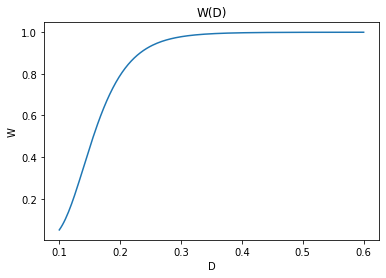

In [47]:
D_values = np.linspace(0.1, 0.6, 200)
W_values = np.array([integrate.quad(Chi2, 3.641 / D_values[i], np.inf)[0] for i in range(200) ])

plt.plot(D_values, W_values)
plt.title("W(D)")
plt.xlabel("D")
plt.ylabel("W")